# Assumption Tests and Diagnostics for Regression


When fitting a linear or multiple regression model there are a number of asusmptions that have to be met regarding the distribution of the variables being used and the relationships between those variables. These assumptions, and violations of them, can be assessed through plots and data visualisations, as well as through the use of certain statistical tests. Some of these tests/ assumptions apply to both simple linear regression (with one independent variable (IV) and one dependent variable (DV)) and multiple regression (more than one IV and one DV), others are specifically relevant for multiple regression. Regression models are generally used when we have a scale IV(s) and want to assess the relationship with and predict values on a scale DV. In later notebooks I will demonstrate how to run and interpret both linear and multiple regression models. In this notebook I will work through how to investigate and test the different assumptions for regression. The assumptions I will cover are:

- Linearity: The assumption that there is a linear (straight line) relationship between the DV and IV(s). 
- Multicolinearity: The assumption that the IVs in a multiple regression model are not too highly correlated. 
- Normality of residuals (error terms): The assumption that the residuals (the difference between the actual values and those predicted by the regression line) are normally distributed. 
- Homoscedasticity: The assumption that the variance for the DV is constant along all values of the IV scale. 
- Independence of error terms: The assumption that each predicted value is independent and not related to any other predictions. 
- Outliers (influence statistics): The assumption that there are no outliers or influential scores in our data that will have an undue effect on the regression model (the slope of the regression line for a given IV). 

To demonstrate how to assess these assumptions I will use datasets to fit a couple of regression models. One for a multiple regression design and one for a simple linear regression model. I will fit these models using the statsmodels software library. This library also provides a number of statistical methods to run regression diagnostics. 

In [1]:
# Importing key software libraries. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

%matplotlib inline

In [2]:
# Importing a dataset to use for regression and assumption testing. 

df = pd.read_csv("mtcars.csv")

df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


I am using the mtcars dataset. This is a small dataset, containing data measuring several variables on 32 different models of cars. A number of the variables are scale variables (recording decimal/ floating point values). These are useful for fitting a regression model for illustration purposes. 

In [4]:
# Fitting a multiple regression model using the statsmodels ols method. 
# I will investigate the relationship between a DV of mpg and IVs of weight (wt) and displacement (disp). 
# Note the tilda (~) separates the DV from the two IVs. The IVs are separated by a plus (+) operator as
# when fitting ordinary least squares regression we are assuming the DV is a function of a linear combination of the IVs.

res = smf.ols("mpg ~ wt + disp", data = df).fit()

In [5]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     51.69
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           2.74e-10
Time:                        11:28:33   Log-Likelihood:                -78.084
No. Observations:                  32   AIC:                             162.2
Df Residuals:                      29   BIC:                             166.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.9606      2.165     16.151      0.000      30.534      39.388
wt            -3.3508      1.164     -2.878      0.007      -5.732      -0.970
disp          -0.0177      0.009     -1.929      0.064      -0.037       0.001
==============================================================================
Omnibus:                        4.079   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                3.665
Skew:                           0.812   Prob(JB):                        0.160
Kurtosis:                       2.666   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

To summarise, the above results show a significant regression model where mpg appears to be significantly predicted by wt (t = 2.88, p = 0.007), but not disp (t = 1.93, p = 0.064). The regression coefficient has a negative value (-3.35) indicating that as wt increased mpg decreased. This seems to intuitively make sense given what we know about car size and fuel consumption. 

Let us now assess whether any of the assumptions our data need to meet for a regression model have been violated. 

## Normality of residuals

We can assess whether the residuals are normally distributed using visualisations, specifically, Kernel Density Estimator (kde) plots and QQPlots (probability plots). We can also check our assumptions using a statistical test, the Jarque-Bera test. 

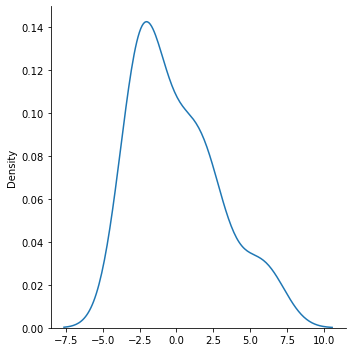

In [6]:
# Fitting a kde plot using the seaborn displot method and setting kind equal to kde. 
# Note that I have passed the model (res) and specified that I want a plot of the residuals. 

import seaborn as sns

sns.displot(res.resid, kind='kde')

The kde plot for our residuals indicates that they may be slightly positively skewed. The appearance of the data does not deviate too strongly from a bell-shaped distribution but we will want to do further checks to make an informaed assessment. A QQ Plot of the residuals will also be useful.  

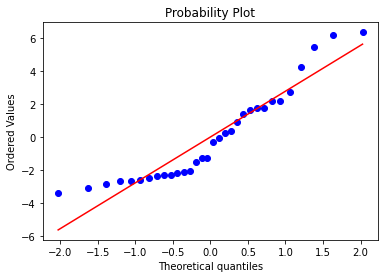

In [7]:
# Creating a QQ plot using matplotlib and the scipy probplot method.

import scipy.stats as stats

fig, ax = plt.subplots(figsize=(6, 4))
stats.probplot(res.resid, plot = ax, fit = True)

plt.show()

The probability plot seems to suggest that our residuals deviate from normality. Values at the tails of the distribution appear to be a bit of an issue. Many of the residuals are close to the 45 degree line on the probability plot suggesting the actual and predicted values correspond quite closely. So, we have some degree of deviation from a normal distribution, this is often the case as data is noisy and we are never likely to have a perfect distribution. In this case, it is worth us using a statistical test to check whether the extent of deviation of our residuals from normality is sufficient to violate this assumption 

Having created plots to check the normality of residuals we can follow this up using the Jarque-Bera test. This is a goodness of fit test that uses the Chi-Square distribution. It measures if the data has skewness and kurtosis similar to that of a normal distribution. The Jarque-Bera test returns a test statistic with a positive value. The greater that value (further away from 0) the less likely that the data matches a normal distribution. The Jarque-Bera test returns an associated p-value. The null hypothesis for the test is that the data follows a normal distribution, so significant p-values (p < 0.05) indicate violations of normality and the residual do not follow a normal distribution.

In [8]:
# Creating an object to display the tests results with labels. 

labels = ["Jarque-Bera", "Chi-Sq p-value", "Skew", "Kurtosis"]

In [9]:
# Running the Jarque-Bera test using the statsmodels jarque_bera method. 

jb_test = sms.jarque_bera(res.resid)
lzip(labels, jb_test)

[('Jarque-Bera', 3.6653866143339866),
 ('Chi-Sq p-value', 0.15998210605368945),
 ('Skew', 0.8120323264783506),
 ('Kurtosis', 2.6661527837960604)]

The above test results show a Jarque-Bera test statistic of Chi-Squared = 3.66 and p = 0.16. This is not a signficant test result suggesting that we cannot reject the null hypothesis that the residuals are normally distributed. This confirms what the plots indicated and we are probably safe to assume normality of the residuals in the model.

## Linearity

Here we are going to use some plots to assess if there is a linear relationship (a straight line relationship) between the DV (mpg) and each of our IVs (wt and disp). To do this we will create some scatter plots using matplotlib for visual inspection. 

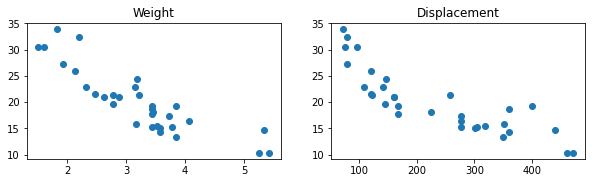

In [10]:
# Creating two scatter plots. Plotting each IV againt the DV separately. 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 2.5))

ax1.scatter(df['wt'], df['mpg'])
ax1.set_title("Weight")
ax2.scatter(df['disp'], df['mpg'])
ax2.set_title("Displacement")

plt.show()

The above scatter plots show each IV plotted along the x-axis against scores on the DV (mpg) plotted along the y-axis. Although not perfect, there appears to be a fairly linear relationship between our IVs and the DV. As scores on each IV increase the mpg values get lower, so, we have this general linear trend of decreasing mpg as weight and displacement increase. 

We can also conduct a statistical test to assess this for our model. One such test is the Harvey-Collier test. This test assesses whether linearity of the parameters in our overall model is violated. This test does not assess the IVs separately as we have done in the above plots. The Harvey-Collier test performs a t-test, with degrees of freedom equal to our model parameters, on the recursive residuals. Recursive residuals are linear transformation of ordinary residuals and are independently and identically distributed. If the true relationship between the IVs and DV in our model is not linear then the mean of the recursive residuals with differ from 0. As with other statistical tests of assumptions, the null hypothesis for this test is that the relationship is linear. If we find we get a statistically significant result (p < 0.05) then we have to reject this null hypothesis and it is likely the assumption of linearity has not been met for our variables.  

In [11]:
# We can perform the Harvey-Collier test using statsmodels. 

labels_2 = ['t value', 'p-value']
hc_test = sms.linear_harvey_collier(res)
lzip(labels_2, hc_test)

[('t value', -0.2973991657676703), ('p-value', 0.7683571252567698)]

The result of the Harvey-Collier test is not signficant (p = 0.77). This confirms our belief after inspecting the scatter plots that the relationship between our IVs and the DV is linear and this assumption has been met. 

## Multicollinearity

A key assumption of multiple regression models is that the IVs are not too highly correlated with each other. When IVs in a multiple regression model are highly correlated then scores on those IVs are not independent and scores on one can be predicted by and change with scores on the other in a systematic way. If two IVs are extremely highly correlated then they are capturing the same variability in the DV and one of them can be removed from the model. They are effectively measuring the same relationship. We can test to see whether multicollinearity is present in our model by looking at the correlation between our IVs through plots and correlation coefficients. If our IVs have a correlation coefficient of less than/ greater than 0.7 then they are highly correlated and we likely have a problem with the multicollinearity of our variables. We can also calculate the Variance Inflation Factor (VIF) for our IVs and use this to assess whether multicollinearity may be an issue. VIF values of greater than 10 suggest that we potentially have multicollinearity. VIF values of greater than 100 indicate definite issues of multicollinearity between variables. 

<AxesSubplot:>

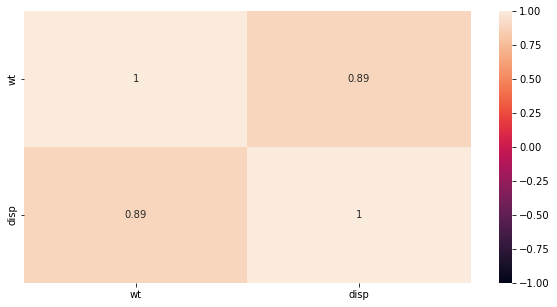

In [12]:
# Using the seaborn heatmap option to visually assess the correlation between our IVs. 
# Note that I have specified the correlation method .corr(). This will give the actual bivariate correlation coefficient. 
plt.figure(figsize=(10,5))
sns.heatmap(df[['wt','disp']].corr(),vmin=-1,annot= True)

The above heatmap indicates that our IVs (wt and disp) are highly positively correlated (r = 0.89). We probably have an issue with multicollinearity. I will calculate two statistics that will help us assess the extent to which we have problem with multicollinearity in our data. The statistics are the Vatiance Inflation Factor (VIF) and the Tolerance. 

Tolerance values for each IV of less than 0.1 indicate issues of collinearity.

The VIF is calculated as the inverse of the Tolerance. VIF values for each IV of 10 or greater indicate an issue with collinearity. 

In [13]:
inp_df = pd.DataFrame(df[['wt', 'disp']])

inp_df.head()

,wt,disp
0,2.620,160.0
1,2.875,160.0
2,2.320,108.0
3,3.215,258.0
4,3.440,360.0


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(inp_df.shape[1]):
    vif.append(variance_inflation_factor(inp_df, i))

In [15]:
pd.DataFrame({'VIF': vif}, index = inp_df.columns).T

,wt,disp
VIF,14.931913,14.931913


In [16]:
tol = 1 / 14.931913

tol

0.06697065540095232

Above, we can see that we have a VIF of 14.93 for our IVs in the model. This is greater than 10 the threshold of 10 for potential problems. Likewise, calculating the Tolerance manually returns a value of 0.067. Less than the value of 0.1. These results confirm what was highlighted by the heatmap and correlation. We have an issue with multicollinearity of our IVs and this assumption has been violated. We would likely want to address this by dropping one of the IVs from the model. 

## Homoscedasticity


A key assumption of regression is that the spread of residuals around the regression line is constant along all values of the input IVs. When the assumption of constant variance (homoscedasticity) is violated this is clearly visible on a scatter plot of the residuals. Rather than being evenly spread above and below the predicted value of the regression line the data points will have much more variability on some parts of the scale than others. 
As with other assumptions, we can assess constant variance by visualising the data on a plot and also using statistical tests. Commonly used statistical tests of homscedasticity are the White test and the Breusch-Pagan test. The Breusch-Pagan test is better when the dataset is large. 


eval_env: 1


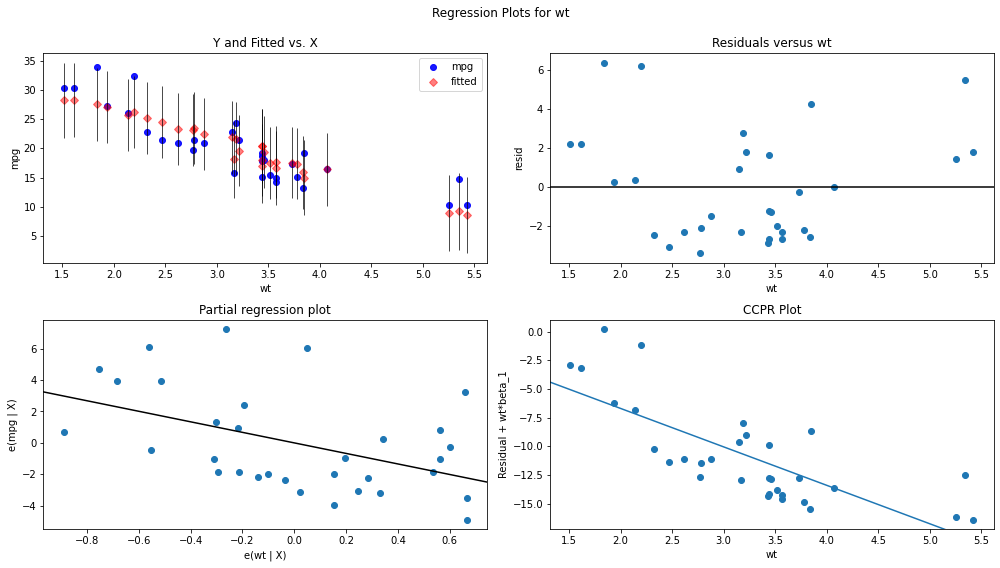

In [17]:
# Obtaining scatter plots of the residuals to visually assess homoscedasticty. 

fig = plt.figure(figsize=(14, 8))
  
fig = sm.graphics.plot_regress_exog(res, 'wt', fig=fig)

The above command has given us a number of diagnostic plots for the weight (wt) IV in our regression model. The plot in the top right is the one of interest in assessing homoscedasticity. This plot shows weight scores (x-axis) plotted against the residuals (y-axis). If our data has constant variance we would expect the data points to be evenly spread above and below the y-axis reference set at 0 (highlighted with a black line) and for this to be the case all the way along the x-axis scale. inspecting this plot, it seems we may have an issue of heteroscedasticity for this variable as the residuals for low and high weight values appear to be mostly above the line, representing positive error terms.


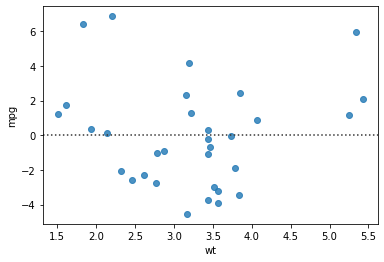

In [18]:
# An alternative (and simpler) way to obtain a residual plot for out wt IV is using the seaborn residplot method. 
# The same pattern is obviously apparent in this plot. 
sns.residplot(x='wt', y='mpg', data=df)
  
plt.show()

We can also check the other IV (disp) for homoscedasticity using residual scatter plots. 

eval_env: 1


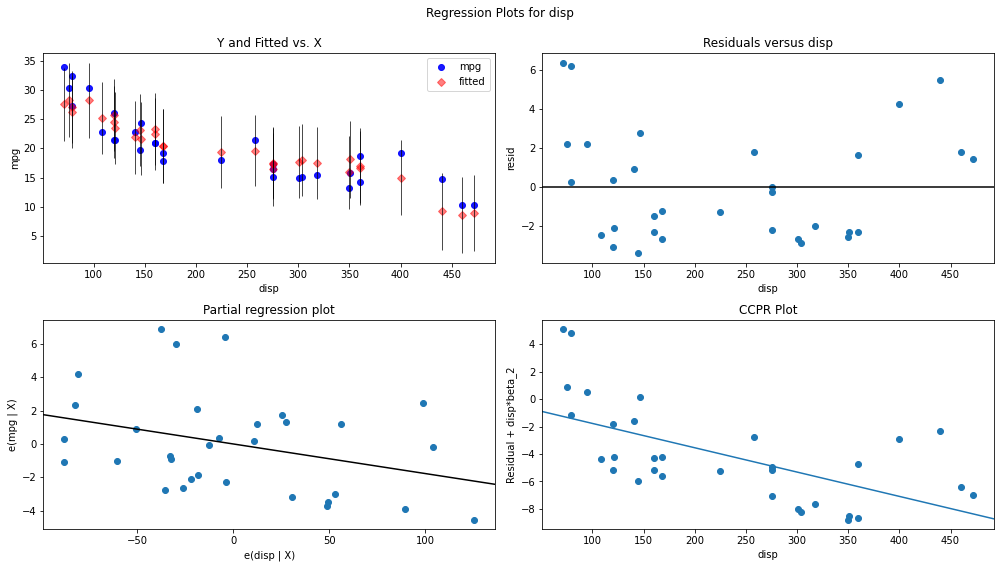

In [19]:
# Obtaining scatter plots of the residuals to visually assess homoscedasticty. 

fig = plt.figure(figsize=(14, 8))
  

fig = sm.graphics.plot_regress_exog(res, 'disp', fig=fig)

Similarly with the disp IV, we appear to have more positive residuals at high and low values and more negative residual around the middle of the displacement (disp) scale on the x-axis. 

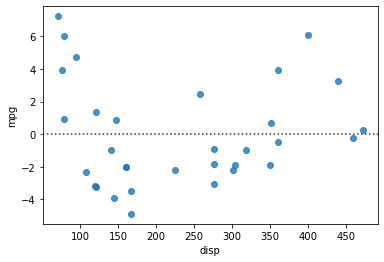

In [20]:
# Seaborn residplot for the disp IV. 
sns.residplot(x='disp', y='mpg', data=df)
  
plt.show()

Visual inspection of the IVs in our model seems to suggest that the residuals are heteroscedastic and differ in variability along the scale of the IVs. We can follow up these visual inspections using a White test. This may help to confirm any concerns we have about heteroscedasticty of our variables.

In [21]:
# Conducting a White test on the regression model. 

from statsmodels.stats.diagnostic import het_white
 
labels_3 = ['Lagrange Multiplier statistic:', 'p-value:', 'F-statistic:', 'p-value:']

white_t = het_white(res.resid, res.model.exog)
 
# Print the results. We will get to see the values of two test-statistics and the corresponding p-values
lzip(labels_3, white_t)

[('Lagrange Multiplier statistic:', 6.568553136314197),
 ('p-value:', 0.25475461483398104),
 ('F-statistic:', 1.343080340332768),
 ('p-value:', 0.2777337255372134)]

The White test can be interpreted in a similar way to other statistical tests of assumption. If the test is not significant we do not reject the null hypothesis. In this case the null hypothesis is that there is no relationship between the residuals of the model and the models IVs. When the test is not significant the residuals of the regression model have the same variance and are homoscedastic. Here we can see the output for two test statistics, the Lagrange multiplier and an F-test. 

The tests are both non-significant. The F-test is the one we would focus on to assess homoscedasticity. Here we have an F-value of 1.34 and an associated p-value of 0.28. There are limitations with statistical assumption tests such as this, but the result seems to indicate that the deviations from a homoscedastic distribution in our data are no so extreme as to violate this asusmption. 


## Independence of Error (no autocorrelation of residuals)

Assessing independence of residuals is not easily achieved. It is possible to verify this using visualisations if there is a clear pattern to the error terms. They may follow a relationship like our IVs in this regression model where the residuals appear to have positive deviations at low values, negative deviations in the middle of the scale and positive values again at the high values of the IV. A residual plot showing a zig-zagging pattern along the scale would suggest that errors (residuals) may be independent. 

A statistical test to assess independence of error terms is the Durbin Watson test. If this test returns a value betwene 1.5 and 2.5 then we are usually safe to assume independence of error terms. 

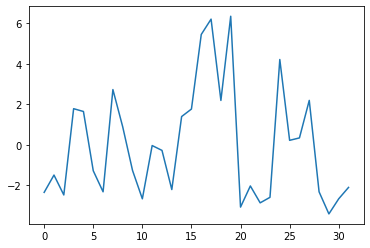

In [22]:
# This line plot of the residuals for our model has a pattern of zig-zagging peaks and troughs.
# This might suggest the error terms are independent. 

plt.plot(res.resid)

In [23]:
# Performing the Durbin Watson test using the statsmodels method. 

from statsmodels.stats.stattools import durbin_watson

durbin_watson(res.resid)


1.2765690081508534

The Durbin Watson test returns a value of approximately 1.28. This is outside the range of recommended values (1.5 - 2.5) for this test. Here we should conclude that it is not safe to asusme independence of error and autocorrelation of residuals may be a problem for our regression model. 


## Leverage and Influence Tests

Datapoints that have values that are very different form the majority of observations in our dataset are said to have high leverage. Influential datapoints are those that have values so extreme (outlier scores) that their removal from the dataset would cause a significant change in the estimates for the regression model coefficients. 

There are two tests we can use to find outlier points that may have high leverage or influence. We can use Cook's distance to assess which points are univariate outliers. These being a point that has high influence on only one variable. The Mahalanobis distance test can be used to evaluate whether any points are multivariate outliers. These would be points that have extreme or high leverage scores on more than one of our IVs. 

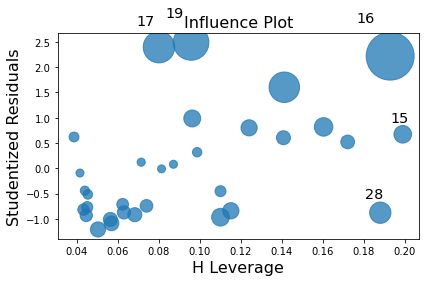

In [24]:
# Firstly, obtaining an influence plot using Cook's distance as the criterion. 

fig = sm.graphics.influence_plot(res, criterion="cooks")
fig.tight_layout(pad=1.0)

In the above plot, high leverage scores are plotted along the x-axis. The fact that a number of data points are towards the higher end of the x-axis scale indicates there may be quite a few datapoints that have high leverage scores. The size of the blue dots provides an indication of their Cook's distance. Larger dots indicate a high Cook's distance, suggesting those data points are likely to be univariate outliers in our model. There are a number of these data points and we would want to investigate this further. In addition to our plot, we can use the function .get_influence() to assess the influence of each observation and compare them to the cricital Cook’s distance. 

In [25]:
# Here I calculate Cook's distance and the critical value that indicates which scores are univariate outliers. 
# Obtain Cook's distance 
res_cooksd = res.get_influence().cooks_distance[0]

# Get length of df to obtain n
n = len(df["wt"])

# calculate critical d
critical_d = 4/n
print('Critical Cooks distance:', critical_d)

# identification of potential outliers with leverage
out_d = res_cooksd > critical_d

# output potential outliers with leverage
print(df.index[out_d], "\n", 
    res_cooksd[out_d])

Critical Cooks distance: 0.125
Int64Index([16, 17, 19, 24], dtype='int64') 
 [0.34411184 0.14298998 0.18505251 0.13317629]


The above output gives us the critical value for Cook's distance of 0.125. Any datapoints with a Cook's distance greater than this are univariate outliers. The datapoints that exceed this critical value are then provided in two lists. The first shows the index of the datapoint in the datset. The second gives the actual Cook's distance for that datapoint. Here we can see there are four datapoints that have a Cook's distance greater than the criticla value and these can be considered as univariate outliers. We would most likely want to remove these datapoints and then run the regression model again.

Having assessed univariate outliers, we can now consider whether any of our datapoints are multivariate outliers by assessing their Mahalanobis distance against a critical value. 

In [26]:
# Creating a new dataframe containing only the variables in the regression model. 

df_2 = df[['mpg', 'wt', 'disp']]

df_2.head()

,mpg,wt,disp
0,21.0,2.620,160.0
1,21.0,2.875,160.0
2,22.8,2.320,108.0
3,21.4,3.215,258.0
4,18.7,3.440,360.0


In [27]:
# Creating a function to calculate Mahalanobis distance. 

def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()




In [28]:
# Creating a new column in dataframe that contains Mahalanobis distance for each row. 

df_2['mahalanobis'] = mahalanobis(x=df_2, data=df_2[['mpg', 'wt', 'disp']])

C:\Users\robert65\Documents\Anaconda\envs\DSFS\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\robert65\AppData\Local\Temp\ipykernel_4872\2712733226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['mahalanobis'] = mahalanobis(x=df_2, data=df_2[['mpg', 'wt', 'disp']])


In [29]:
# The mahalanobis distance for each datapoint has been added as a column to the dataframe. 
df_2.head()

,mpg,wt,disp,mahalanobis
0,21.0,2.620,160.0,1.067759
1,21.0,2.875,160.0,0.721386
2,22.8,2.320,108.0,1.755352
3,21.4,3.215,258.0,0.633875
4,18.7,3.440,360.0,3.736478


In [30]:
# Calculating the p-value for each Mahalanobis distance.
# Those with a signficant Mahalanobis distance are multivariate outliers. 
df_2['mahal_p'] = 1 - stats.chi2.cdf(df_2['mahalanobis'], 3)

C:\Users\robert65\AppData\Local\Temp\ipykernel_4872\445149705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['mahal_p'] = 1 - stats.chi2.cdf(df_2['mahalanobis'], 3)


In [31]:
df_2

,mpg,wt,disp,mahalanobis,mahal_p
0,21.0,2.620,160.0,1.067759,0.784862
1,21.0,2.875,160.0,0.721386,0.868163
2,22.8,2.320,108.0,1.755352,0.624699
3,21.4,3.215,258.0,0.633875,0.888635
4,18.7,3.440,360.0,3.736478,0.291362
5,18.1,3.460,225.0,0.602745,0.895804
6,14.3,3.570,360.0,3.276020,0.350994
7,24.4,3.190,146.7,2.953977,0.398776
8,22.8,3.150,140.8,2.192169,0.533493
9,19.2,3.440,167.6,2.645604,0.449551


In the above cells, I have created a function to calculate the Mahalanobis distance for each of our datapoints. I have then used the scipy chi-squared distribution Cumulative Distribution Function (cdf) to calculate the p-value for each Mahalanobis distance. Those distances that reach a statistically significant p-value (p < 0.05) can be considered multivariate outliers. As we only have 32 observations in this dataset we can inspec the whole dataset without filtering for p-values below 0.05. It appears that we have only one multivariate outlier, the data point at index 16. This has a Mahalanobis distance of 8.74 and an associated p-value of 0.03. 

## Summary:

In this notebook I have covered the different data assumptions that need to be met in order to conduct a simple linear or multiple regression analysis. I have illustrated how to check the assumptions for regression using visualisation and statistical tests, with the example of a multiple regression model on a small dataset. 

Key assumptions that need to be checked are:

- Normality of Residual
- Linearity
- Multicollinearity
- Homoscedasticity
- Independence of errors (no autocorrelation of errors)
- Leverage and influential datapoints